In [1]:
import numpy as np
import random as rd
import networkx as nx #to plt the graph
from matplotlib import pyplot as plt


data = {}
data['tijk'] = [ #tijk
    [0, 6, 9, 8, 7, 3, 6, 2, 3, 2, 6, 6, 4, 4, 5, 9, 7],                 #0
    [6, 0, 8, 3, 2, 6, 8, 4, 8, 8, 13, 7, 5, 8, 12, 10, 14],             #1 
    [9, 8, 0, 11, 10, 6, 3, 9, 5, 8, 4, 15, 14, 13, 9, 18, 9],           #2
    [8, 3, 11, 0, 1, 7, 10, 6, 10, 10, 14, 6, 7, 9, 14, 6, 16],          #3   
    [7, 2, 10, 1, 0, 6, 9, 4, 8, 9, 13, 4, 6, 8, 12, 8, 14],             #4
    [3, 6, 6, 7, 6, 0, 2, 3, 2, 2, 7, 9, 7, 7, 6, 12, 8],                #5
    [6, 8, 3, 10, 9, 2, 0, 6, 2, 5, 4, 12, 10, 10, 6, 15, 5],            #6
    [2, 4, 9, 6, 4, 3, 6, 0, 4, 4, 8, 5, 4, 3, 7, 8, 10],                #7
    [3, 8, 5, 10, 8, 2, 2, 4, 0, 3, 4, 9, 8, 7, 3, 13, 6],               #8
    [2, 8, 8, 10, 9, 2, 5, 4, 3, 0, 4, 6, 5, 4, 3, 9, 5],                #9
    [6, 13, 4, 14, 13, 7, 4, 8, 4, 4, 0, 10, 9, 8, 4, 13, 4],            #10
    [6, 7, 15, 6, 4, 9, 12, 5, 9, 6, 10, 0, 1, 3, 7, 3, 10],             #11
    [4, 5, 14, 7, 6, 7, 10, 4, 8, 5, 9, 1, 0, 2, 6, 4, 8],               #12
    [4, 8, 13, 9, 8, 7, 10, 3, 7, 4, 8, 3, 2, 0, 4, 5, 6],               #13
    [5, 12, 9, 14, 12, 6, 6, 7, 3, 3, 4, 7, 6, 4, 0, 9, 2],              #14
    [9, 10, 18, 6, 8, 12, 15, 8, 13, 9, 13, 3, 4, 5, 9, 0, 9],           #15
    [7, 14, 9, 16, 14, 8, 5, 10, 6, 5, 4, 10, 8, 6, 2, 9, 0],            #16
]
data['time_windows'] = [
   #(ai, bi)
    (0, 100),  # i = o(k)
    (0, 100),  # i = 1
    (0, 100),  # i = 2
    (0, 100),  # i = 3
    (0, 100),  # i = 4
    (0, 100),  # i = 5
    (0, 100),  # i = 6
    (0, 100),  # i = 7
    (0, 100),  # i = 8
    (0, 100),  # i = 9
    (0, 100),  # i = 10
    (0, 100),  # i = 11
    (0, 100),  # i = 12
    (0, 100),  # i = 13
    (0, 100),  # i = 14
    (0, 100),  # i = 15
    (0, 100),  # i = 16
]
data['pickups_deliveries'] = [
    [1, 6],
    [2, 10],
    [4, 3],
    [5, 9],
    [7, 8],
    [15, 11],
    [13, 12],
    [16, 14],
]
data['k'] = 7  #k: num vehicule 
data['o(k)'] = 0 # o(k) origin

data['P'] = []
for j in range(len(data['pickups_deliveries'])):
    data['P'].append(data['pickups_deliveries'][j][0])

data['D'] = []
for j in range(len(data['pickups_deliveries'])):
    data['D'].append(data['pickups_deliveries'][j][1])


In [2]:
print("tijk =", data['tijk'], '\n')
print("P =", data['P'], '\n')
print("D =", data['D'], '\n')
print("N =", data['P'] + data['D'], '\n')
print("k =", data['k'], '\n')

tijk = [[0, 6, 9, 8, 7, 3, 6, 2, 3, 2, 6, 6, 4, 4, 5, 9, 7], [6, 0, 8, 3, 2, 6, 8, 4, 8, 8, 13, 7, 5, 8, 12, 10, 14], [9, 8, 0, 11, 10, 6, 3, 9, 5, 8, 4, 15, 14, 13, 9, 18, 9], [8, 3, 11, 0, 1, 7, 10, 6, 10, 10, 14, 6, 7, 9, 14, 6, 16], [7, 2, 10, 1, 0, 6, 9, 4, 8, 9, 13, 4, 6, 8, 12, 8, 14], [3, 6, 6, 7, 6, 0, 2, 3, 2, 2, 7, 9, 7, 7, 6, 12, 8], [6, 8, 3, 10, 9, 2, 0, 6, 2, 5, 4, 12, 10, 10, 6, 15, 5], [2, 4, 9, 6, 4, 3, 6, 0, 4, 4, 8, 5, 4, 3, 7, 8, 10], [3, 8, 5, 10, 8, 2, 2, 4, 0, 3, 4, 9, 8, 7, 3, 13, 6], [2, 8, 8, 10, 9, 2, 5, 4, 3, 0, 4, 6, 5, 4, 3, 9, 5], [6, 13, 4, 14, 13, 7, 4, 8, 4, 4, 0, 10, 9, 8, 4, 13, 4], [6, 7, 15, 6, 4, 9, 12, 5, 9, 6, 10, 0, 1, 3, 7, 3, 10], [4, 5, 14, 7, 6, 7, 10, 4, 8, 5, 9, 1, 0, 2, 6, 4, 8], [4, 8, 13, 9, 8, 7, 10, 3, 7, 4, 8, 3, 2, 0, 4, 5, 6], [5, 12, 9, 14, 12, 6, 6, 7, 3, 3, 4, 7, 6, 4, 0, 9, 2], [9, 10, 18, 6, 8, 12, 15, 8, 13, 9, 13, 3, 4, 5, 9, 0, 9], [7, 14, 9, 16, 14, 8, 5, 10, 6, 5, 4, 10, 8, 6, 2, 9, 0]] 

P = [1, 2, 4, 5, 7, 15, 13, 16]

In [3]:
def tabu_search(data):
    tabu_list = [int(name) for name in range(len(data['tijk']))]
    G = [[0] for c in range(data['k'])]
    Tik = np.zeros(data['k'])
    tabu_list.remove(0)
    p = np.zeros(data['k'])
    while len(tabu_list) > 0:
        for k in range(data['k']):
            if len(tabu_list) == 0:
                break
            u = G[k][-1]
            v = tabu_list[-1]
            minimum = float("inf")
            for w in tabu_list:
                for itr in range(50000):
                    if data['tijk'][int(u)][int(w)] < minimum \
                        and w in data['P'] or (w in data['D'] \
                        and data['P'][data['D'].index(w)] not in tabu_list \
                        and data['P'][data['D'].index(w)] in G[k]): 
                        minimum = data['tijk'][int(u)][int(w)]
                        v = w
                    if Tik[k] + data['tijk'][int(u)][int(w)] > data['time_windows'][v][1]:
                        break
                        return('Error time window')                
            G[k].append(v)
            pk = int(p[k])
            Tik[k] += data['tijk'][pk][v]
            print('vehicule', k + 1)
            print('ftom', int(p[k]),'to', v)
            print('T {} {} = {}' .format(v, k + 1, Tik[k]))
            print('\n')
            p[k] = v
            tabu_list.remove(v)
        if Tik[k] + data['tijk'][int(u)][int(v)] > data['time_windows'][v][1]:
            raise ValueError('A very specific bad thing with time windows happened.')            
    return G, Tik

In [4]:
print('T_ik: Time variable indicating the start date of service at point i by the truck k.\n')
G, Tik = tabu_search(data)

T_ik: Time variable indicating the start date of service at point i by the truck k.

vehicule 1
ftom 0 to 7
T 7 1 = 2.0


vehicule 2
ftom 0 to 5
T 5 2 = 3.0


vehicule 3
ftom 0 to 13
T 13 3 = 4.0


vehicule 4
ftom 0 to 1
T 1 4 = 6.0


vehicule 5
ftom 0 to 4
T 4 5 = 7.0


vehicule 6
ftom 0 to 16
T 16 6 = 7.0


vehicule 7
ftom 0 to 2
T 2 7 = 9.0


vehicule 1
ftom 7 to 8
T 8 1 = 6.0


vehicule 2
ftom 5 to 9
T 9 2 = 5.0


vehicule 3
ftom 13 to 12
T 12 3 = 6.0


vehicule 4
ftom 1 to 6
T 6 4 = 14.0


vehicule 5
ftom 4 to 3
T 3 5 = 8.0


vehicule 6
ftom 16 to 14
T 14 6 = 9.0


vehicule 7
ftom 2 to 10
T 10 7 = 13.0


vehicule 1
ftom 8 to 15
T 15 1 = 19.0


vehicule 2
ftom 9 to 11
T 11 2 = 11.0




In [5]:
for k in range(data['k']):
    print('G {} = (V {}, A {}):'.format(k + 1, k + 1, k + 1))
    print(G[k], '\n')

G 1 = (V 1, A 1):
[0, 7, 8, 15] 

G 2 = (V 2, A 2):
[0, 5, 9, 11] 

G 3 = (V 3, A 3):
[0, 13, 12] 

G 4 = (V 4, A 4):
[0, 1, 6] 

G 5 = (V 5, A 5):
[0, 4, 3] 

G 6 = (V 6, A 6):
[0, 16, 14] 

G 7 = (V 7, A 7):
[0, 2, 10] 



In [6]:
def visual(G, k):
    g = nx.Graph() 
    for k in range (data['k']):  
        for i in range(len(G[k]) - 1):
            g.add_edge(G[k][i], G[k][i+1]) 
    nx.draw_circular(g, with_labels = True, edge_color='r') 

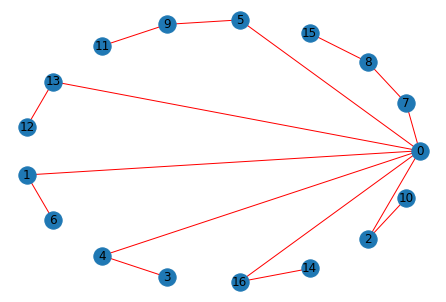

In [7]:
visual(G, data['k'])